<a href="https://colab.research.google.com/github/JAIDHEER007/Modular-Times-Table/blob/main/TTM_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from math import sin, cos, sqrt, radians
from IPython.display import display
import urllib.request

In [42]:
class timeTableM:
    def __init__(self, size, divisions, lwidth = 1, cwidth = 2):
        self.size = size
        self.divisions = divisions
        self.radius = sqrt((self.size[0] ** 2) + (self.size[1] ** 2)) // 3.5
        self.theta = 360 / self.divisions
        self.__lwidth = lwidth
        self.__cwidth = cwidth

        self.__coordinates = []
        shiftX = -(self.size[0] / 2)
        shiftY = self.size[1] / 2

        for i in range(self.divisions):
            rad = radians(i * self.theta)
            self.__coordinates.append(((self.radius * cos(rad)) - shiftX, shiftY - (self.radius * sin(rad))))

        self.__baseImage = Image.new(mode = 'RGB', size = size)
        draw = ImageDraw.Draw(im = self.__baseImage)
        center = (self.size[0] // 2, self.size[1] // 2)
        leftCorner = (center[0] - self.radius, center[1] - self.radius)
        rightCorner = (center[0] + self.radius, center[1] + self.radius)

        boundingBox = [leftCorner, rightCorner]
        draw.ellipse(xy = boundingBox, fill = None, outline = (255, 255, 255), width = self.__cwidth)

        fontUrl = 'https://github.com/ProgrammingFonts/ProgrammingFonts/raw/master/Droid-Sans-Mono/droid-sans-mono-1.00/Droid%20Sans%20Mono.ttf'
        urllib.request.urlretrieve(fontUrl, 'font.ttf')

        # Manual Editing
        # Plans to automate it
        self.__textX = 10
        self.__textY = self.size[1] - 30
        self.__fontSize = 20

    def showBaseImage(self):
        display(self.__baseImage)

    def showBaseImageText(self):
        img = self.__baseImage.copy()
        draw = ImageDraw.Draw(im = img)
        customFont = ImageFont.truetype('font.ttf', self.__fontSize)
        text = "Divisions: 553  K: 007"
        draw.text(xy = (self.__textX, self.__textY),font = customFont, text = text, fill = (255, 255, 255))
        display(img)


    def getOutput(self, k):
        img = self.__baseImage.copy()
        draw = ImageDraw.Draw(im = img)
        for i in range(self.divisions):
            draw.line(xy = [self.__coordinates[i], self.__coordinates[(i * k) % self.divisions]], fill = (0, 0, 255), width = self.__lwidth)
        return img

    def getOutputText(self, k):
        img = self.getOutput(k)
        draw = ImageDraw.Draw(im = img)
        customFont = ImageFont.truetype('font.ttf', self.__fontSize)
        text = "Divisions: {div}  K: {kval}".format(div = self.divisions, kval = k)
        draw.text(xy = (self.__textX, self.__textY),font = customFont, text = text, fill = (255, 255, 255))
        return img


In [43]:
ttm1 = timeTableM(size = (800, 800), divisions = 500, cwidth = 3)

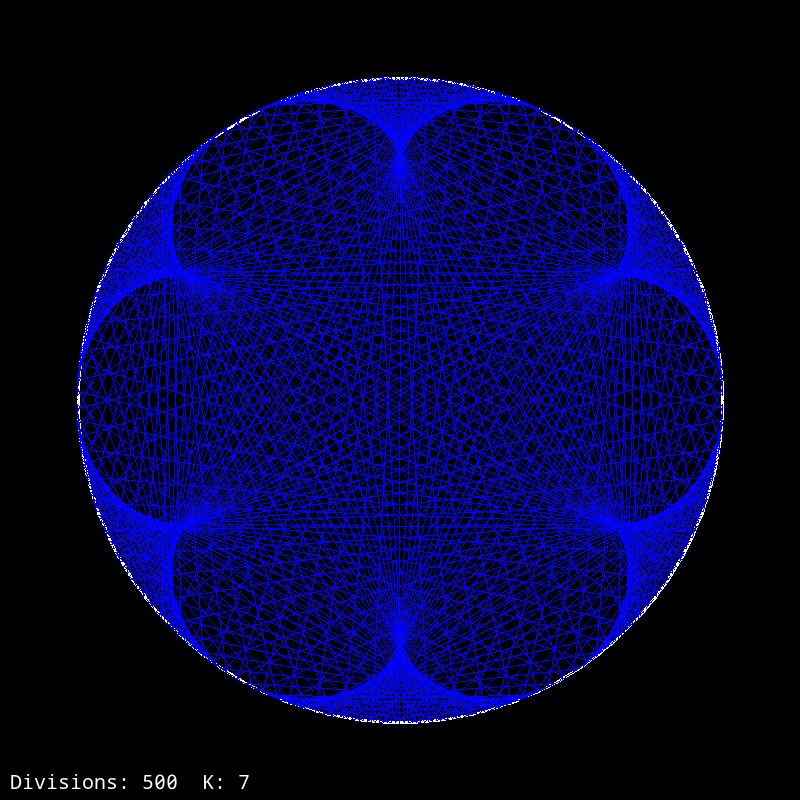

In [44]:
result = ttm1.getOutputText(7)
display(result)